In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sales_data.csv", encoding="latin-1") 
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df = df[["ORDERNUMBER", "QUANTITYORDERED", "PRICEEACH", "SALES","CITY", "STATE", "COUNTRY", "YEAR_ID" ,"PRODUCTCODE"]]
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,CITY,STATE,COUNTRY,YEAR_ID,PRODUCTCODE
0,10107,30,95.70,2871.00,NYC,NY,USA,2003,S10_1678
1,10121,34,81.35,2765.90,Reims,NaN,France,2003,S10_1678
2,10134,41,94.74,3884.34,Paris,NaN,France,2003,S10_1678
3,10145,45,83.26,3746.70,Pasadena,CA,USA,2003,S10_1678
4,10159,49,100.00,5205.27,San Francisco,CA,USA,2003,S10_1678
...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,2244.40,Madrid,NaN,Spain,2004,S72_3212
2819,10373,29,100.00,3978.51,Oulu,NaN,Finland,2005,S72_3212
2820,10386,43,100.00,5417.57,Madrid,NaN,Spain,2005,S72_3212
2821,10397,34,62.24,2116.16,Toulouse,NaN,France,2005,S72_3212


In [4]:
df = df.dropna().reset_index()

In [5]:
df = df.drop(['index'],axis = 1)

In [6]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,CITY,STATE,COUNTRY,YEAR_ID,PRODUCTCODE
0,10107,30,95.70,2871.00,NYC,NY,USA,2003,S10_1678
1,10145,45,83.26,3746.70,Pasadena,CA,USA,2003,S10_1678
2,10159,49,100.00,5205.27,San Francisco,CA,USA,2003,S10_1678
3,10168,36,96.66,3479.76,Burlingame,CA,USA,2003,S10_1678
4,10201,22,98.57,2168.54,San Francisco,CA,USA,2003,S10_1678


In [7]:
df.columns = ['Order-Number', 'Quantity-Ordered', 'Price-Each', 'Sales', 'City', 'State', 'Country','Year', 'Product-Code']

In [8]:
df.head()

,Order-Number,Quantity-Ordered,Price-Each,Sales,City,State,Country,Year,Product-Code
0,10107,30,95.70,2871.00,NYC,NY,USA,2003,S10_1678
1,10145,45,83.26,3746.70,Pasadena,CA,USA,2003,S10_1678
2,10159,49,100.00,5205.27,San Francisco,CA,USA,2003,S10_1678
3,10168,36,96.66,3479.76,Burlingame,CA,USA,2003,S10_1678
4,10201,22,98.57,2168.54,San Francisco,CA,USA,2003,S10_1678


In [9]:
# Average Sale Per Country
df.groupby('Country')['Sales'].mean()

Country
Australia    3408.773514
Canada       3201.122286
Japan        3618.611731
UK           3009.263077
USA          3613.528715
Name: Sales, dtype: float64

In [10]:
# Total Sales Per Country
df.groupby('Country')['Sales'].sum().sort_values(ascending=False)

Country
USA          3627982.83
Australia     630623.10
Canada        224078.56
Japan         188167.81
UK             78240.84
Name: Sales, dtype: float64

In [11]:
# Larget Order Per Country
df.groupby('Country')['Sales'].max().sort_values(ascending=False)

Country
USA          14082.80
Japan        10758.00
Australia     9774.03
Canada        9064.89
UK            5652.94
Name: Sales, dtype: float64

In [12]:
# Min Order Per Country
df.groupby('Country')['Sales'].min().sort_values(ascending= True)

Country
USA           541.14
Japan         553.95
Australia     652.35
Canada       1119.93
UK           1192.56
Name: Sales, dtype: float64

In [13]:
# Total Sales per Year
total_sales_per_year = df.groupby('Year')['Sales'].sum()

In [14]:
total_sales_per_year

Year
2003    1612891.83
2004    2281306.77
2005     854894.54
Name: Sales, dtype: float64

In [15]:
# Best Selling by Revenue
best_by_revenue = df.groupby('Product-Code')['Sales'].sum().sort_values(ascending=False)
best_by_revenue

Product-Code
S10_1949    115521.67
S10_4698    111079.47
S18_3232    103021.28
S12_1666     88748.51
S12_2823     78504.29
              ...    
S24_3371     18771.39
S24_2022     18214.22
S24_3969     16704.35
S32_2206     15954.23
S12_3990     13992.78
Name: Sales, Length: 109, dtype: float64

In [16]:
# Best Selling by Quantity
best_by_quantity = df.groupby('Product-Code')['Quantity-Ordered'].sum().sort_values(ascending=False)
best_by_quantity

Product-Code
S18_2949    684
S18_1097    670
S10_2016    670
S18_3232    644
S12_1666    635
           ... 
S24_3371    280
S12_3380    253
S12_1099    252
S12_4675    202
S12_3990    176
Name: Quantity-Ordered, Length: 109, dtype: int64

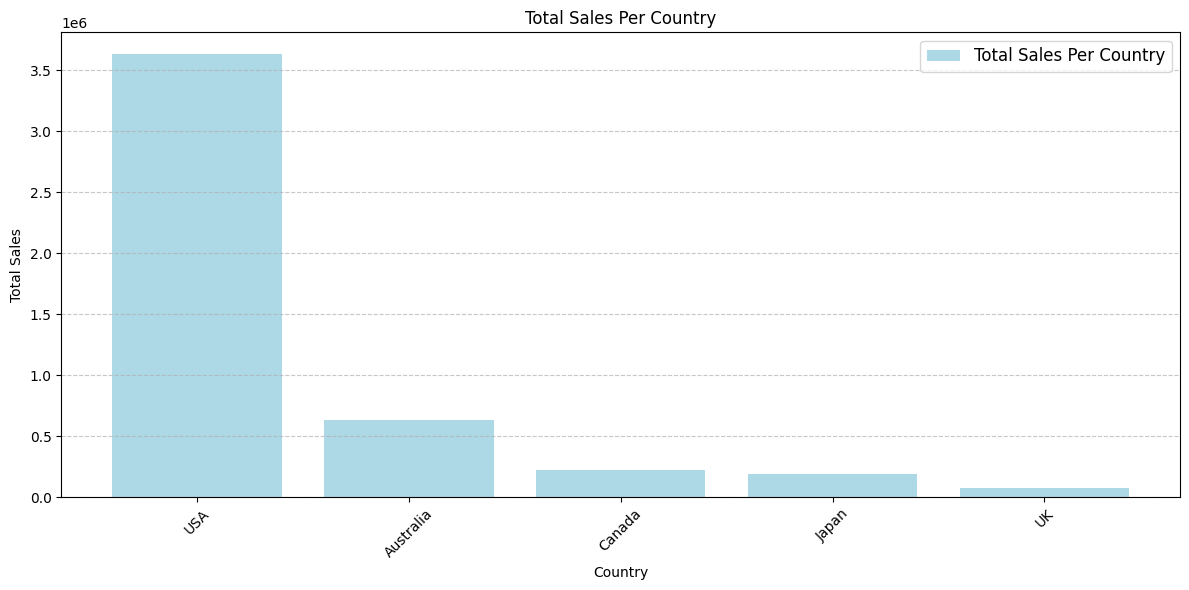

In [19]:
# Bar Chart: Total Sales Per Country

sales_by_country = df.groupby("Country")["Sales"].sum().sort_values(ascending = False)

plt.figure(figsize = (12,6))
plt.bar(sales_by_country.index, sales_by_country.values, color='lightblue', label='Total Sales Per Country')

plt.title("Total Sales Per Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(loc="best", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

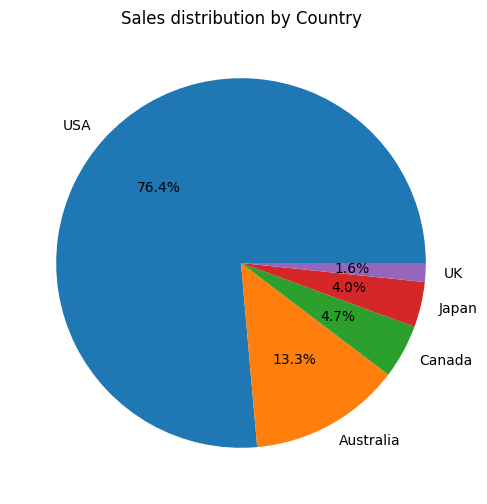

In [27]:
# Pie Chart: Sales distribution by Country

plt.figure(figsize = (12,6))
plt.pie(sales_by_country.values, labels = sales_by_country.index, autopct = '%1.1f%%')
plt.title("Sales distribution by Country")
plt.show()

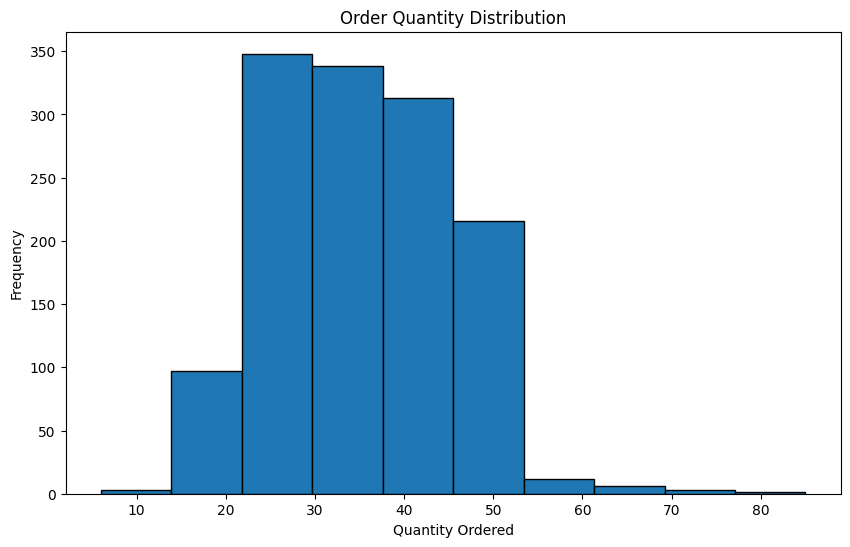

In [39]:
# Histogram: Order Quantity Distribution

plt.figure(figsize=(10,6))
plt.hist(df["Quantity-Ordered"], bins = 10, edgecolor="black")
plt.title("Order Quantity Distribution")
plt.xlabel("Quantity Ordered")
plt.ylabel("Frequency")
plt.show()


In [41]:
df.to_csv("sales_cleaned.csv", index = False)